In [1]:
from sklearn.model_selection import train_test_split

In [12]:
from math import log2
def entropy(n, m):
    if n==0 or m==0:
        return 0
    p = float(n)/(n+m)
    q = float(m)/(n+m)
    return -p*log2(p) - q*log2(q)

l1 = (6.0/13)*entropy(4, 2)+(7.0/13)*entropy(5, 2)
l2 = (6.0/13)*entropy(4, 1)+(7.0/13)*entropy(4, 5)
l3 = (6.0/13)*entropy(3, 5)+(7.0/13)*entropy(4, 1)
l4 = (6.0/13)*entropy(6, 3)+(7.0/13)*entropy(3, 1)
print(l4)

0.8606709135031436


### Question 3

In [109]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

ms_pos = 0
mc_pos = 0
re_pos = 0
ae_pos = 0
for i,n in enumerate( cancer.feature_names):
    if n == 'mean smoothness':ms_pos = i
    elif n == 'mean compactness':mc_pos = i
    elif n == 'radius error':r_pos = i
    elif n == 'area error':ae_pos = i    

cols = {'mean smooth':cancer.data[:,ms_pos],
        'mean compact.':cancer.data[:,mc_pos ], 
        'radius error':cancer.data[:,re_pos], 
        'area error':cancer.data[:,ae_pos]}
for d in cols.keys():
    print(d)
    print("\tmean of mean smoothness: {:.3}".format(cols[d].mean()))
    print("\ts. deviation of mean smoothness: {:.3}".format(cols[d].std()))
    print("\tvariance of mean smoothness: {:.3}".format(cols[d].var()))

# slice columns
cancer4 = np.transpose(np.vstack((cancer.data[:,ms_pos], cancer.data[:,mc_pos], 
               cancer.data[:,re_pos], cancer.data[:,ae_pos])))

mean smooth
	mean of mean smoothness: 0.0964
	s. deviation of mean smoothness: 0.0141
	variance of mean smoothness: 0.000197
mean compact.
	mean of mean smoothness: 0.104
	s. deviation of mean smoothness: 0.0528
	variance of mean smoothness: 0.00278
radius error
	mean of mean smoothness: 14.1
	s. deviation of mean smoothness: 3.52
	variance of mean smoothness: 12.4
area error
	mean of mean smoothness: 40.3
	s. deviation of mean smoothness: 45.5
	variance of mean smoothness: 2.07e+03


### Question 4

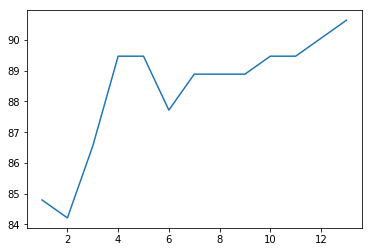

In [105]:
import matplotlib.pyplot as plt
Xtrain, Xtest, Ytrain, Ytest =\
train_test_split(cancer4, cancer.target, random_state=42, train_size=0.7, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier as KNN
scores = []
for i  in range(1, 14):
    clf = KNN(n_neighbors = i )
    clf.fit(Xtrain, Ytrain)
    #print("# Neighbors:", i)
    #print("\tTrain Score: {:.4f}%".format(clf.score(Xtrain, Ytrain)*100))
    scores.append(clf.score(Xtest, Ytest)*100)
    #print("\tTest Score: {:.4f}%".format())
plt.plot(range(1,14), scores )
plt.show()


### Question 5

In [95]:
from sklearn.svm import SVC
Xtrain, Xtest, Ytrain, Ytest =\
train_test_split(cancer4, cancer.target, random_state=42, train_size=0.8, test_size=0.2)

clf = SVC(kernel='rbf')
clf.fit(Xtrain, Ytrain)
print("Training score: {:.4f}".format(clf.score(Xtrain, Ytrain)))
print("Training score: {:.4f}".format(clf.score(Xtest, Ytest)))

# two other regularization and gamma levels
# 1
clf = SVC(kernel='rbf', C=0.1, gamma=1000)
clf.fit(Xtrain, Ytrain)
print("Training score: {:.4f}".format(clf.score(Xtrain, Ytrain)))
print("Training score: {:.4f}".format(clf.score(Xtest, Ytest)))

# two other regularization and gamma levels
# 2
clf = SVC(kernel='rbf', C=10, gamma=10000)
clf.fit(Xtrain, Ytrain)
print("Training score: {:.4f}".format(clf.score(Xtrain, Ytrain)))
print("Training score: {:.4f}".format(clf.score(Xtest, Ytest)))


Training score: 0.9033
Training score: 0.9298
Training score: 0.6286
Training score: 0.6228
Training score: 1.0000
Training score: 0.6228


### Question 6

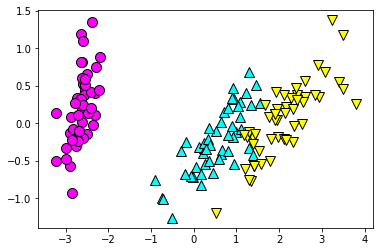

Principal components: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [99]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
pca = PCA(n_components=2)
iris_pca = pca.fit(iris.data).transform(iris.data)
purple = ListedColormap(["#ff0000","#0000ff" ])
mglearn.discrete_scatter(iris_pca[:,0], iris_pca[:,1], iris.target, 
                         c=['#ff00ff', '#00ffff', '#ffff00'])
plt.show()
print("Principal components: \n", pca.components_)